In [1]:
#Importing all useful directories for this project:

import pandas as pd
import numpy as np
import zipfile
import pycountry
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

### Method to download data from Kaggle directly

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#Downloading dataset kaggle api
!kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results
dataset = '/Users/bilal/Downloads/Project/120-years-of-olympic-history-athletes-and-results.zip'
Extracting the files from the downloaded zipfile
with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
df_olympic = pd.read_csv('athlete_events.csv')
df_olympic.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
mapping_country = pd.read_csv('noc_regions.csv')
mapping_country.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
mapping_country.drop('notes', inplace=True, axis=1)

In [5]:
mapping_country = mapping_country.rename({'region':'Country'}, axis =1)
mapping_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [6]:
df_olympic = df_olympic.merge(mapping_country, on='NOC', how='left')
df_olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [7]:
df_olympic.describe()
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   NOC      271116 non-null  object 
 8   Games    271116 non-null  object 
 9   Year     271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  City     271116 non-null  object 
 12  Sport    271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medal    39783 non-null   object 
 15  Country  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


#### Data Completeness: <br>
Olympic data has missing data problems specifically in the columns age, height and weight.<br>
The Medal folder also has a huge chunk of missing value but that is understandable because when athletes don't win any medal they intentionally make it blank. 

In [8]:
df_olympic_duplicate = df_olympic[df_olympic.duplicated()]

In [9]:
df_olympic_duplicate

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK


Olympic data has 271116 unique values and we can see that there are 1385 duplicated values which should be removed before analysis as it will affect our analysis. <br>

### Olympic Data Cleaning: 
1. Drop duplicate.
2. Removing non useful columns.
3. Replacing NAN values in medal with No medal.

In [10]:
# Droping duplicates:
df_olympic = df_olympic.drop_duplicates()
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       269731 non-null  int64  
 1   Name     269731 non-null  object 
 2   Sex      269731 non-null  object 
 3   Age      260416 non-null  float64
 4   Height   210917 non-null  float64
 5   Weight   208204 non-null  float64
 6   Team     269731 non-null  object 
 7   NOC      269731 non-null  object 
 8   Games    269731 non-null  object 
 9   Year     269731 non-null  int64  
 10  Season   269731 non-null  object 
 11  City     269731 non-null  object 
 12  Sport    269731 non-null  object 
 13  Event    269731 non-null  object 
 14  Medal    39772 non-null   object 
 15  Country  269361 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.0+ MB


In [11]:
# removing non useful columns
df_olympic = df_olympic.drop(columns = ['Height', 'Weight', 'Team', 'Games', 'City'], axis=1)
df_olympic.head()

,ID,Name,Sex,Age,NOC,Year,Season,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,DEN,1920,Summer,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [12]:
df_olympic = df_olympic.rename({'NOC':'Country_code'}, axis =1)

In [13]:
df_olympic = df_olympic.reindex(columns=['ID', 'Name', 'Sex','Age', 'Country_code', 'Country', 'Sport','Event','Year', 'Medal'])
df_olympic.sample(10)

,ID,Name,Sex,Age,Country_code,Country,Sport,Event,Year,Medal
123333,62321,Alina Ivanivna Komashchuk,F,23.0,UKR,Ukraine,Fencing,"Fencing Women's Sabre, Team",2016,Silver
97805,49493,Geoffrey Holmes,M,29.0,GBR,UK,Ice Hockey,Ice Hockey Men's Ice Hockey,1924,Bronze
220527,110761,Attila Simon,M,25.0,HUN,Hungary,Athletics,"Athletics Men's 3,000 metres Steeplechase",1964,NaN
117990,59700,"Pamela ""Pam"" Kilborn-Ryan (-Nelson)",F,33.0,AUS,Australia,Athletics,Athletics Women's 100 metres Hurdles,1972,NaN
162775,81744,Isaac dos Santos Moraes,M,22.0,BRA,Brazil,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,1936,NaN
232549,116643,Roger Surmin,M,29.0,FRA,France,Sailing,Sailing Mixed Two Person Dinghy,1976,NaN
68669,35048,Christel Ferrier Bruneau,F,29.0,FRA,France,Cycling,"Cycling Women's Road Race, Individual",2008,NaN
74299,37735,Hiroki Fuwa,M,18.0,JPN,Japan,Athletics,Athletics Men's 4 x 400 metres Relay,1984,NaN
62369,31940,Rachid El-Basir,M,27.0,MAR,Morocco,Athletics,"Athletics Men's 1,500 metres",1996,NaN
20805,10971,Konstantin Ivanovich Beskov,M,31.0,URS,Russia,Football,Football Men's Football,1952,NaN


In [14]:
df_olympic['Medal'] = df_olympic['Medal'].fillna('No Medal')
df_olympic['Medal'].sample(10)

44650     No Medal
21859     No Medal
214321    No Medal
247849    No Medal
159547    No Medal
57933     No Medal
56966     No Medal
137278    No Medal
166596    No Medal
178130    No Medal
Name: Medal, dtype: object

In [15]:
df_olympic['Age'].isnull().sum()
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            269731 non-null  int64  
 1   Name          269731 non-null  object 
 2   Sex           269731 non-null  object 
 3   Age           260416 non-null  float64
 4   Country_code  269731 non-null  object 
 5   Country       269361 non-null  object 
 6   Sport         269731 non-null  object 
 7   Event         269731 non-null  object 
 8   Year          269731 non-null  int64  
 9   Medal         269731 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 22.6+ MB


mean_age = df_olympic['Age'][df_olympic['Age'] != 0].mean()
df_olympic['Age'] = df_olympic['Age'].replace(0, mean_age)

## Athletes Age distribution:

Text(0.5, 1.0, 'Age Distribution')

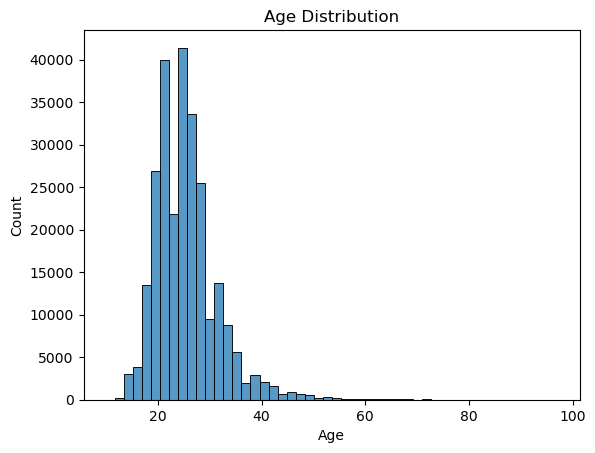

In [16]:
age  = sns.histplot(data=df_olympic, x='Age', bins=50)
age.set_title('Age Distribution')

In [21]:
df_olympic['Age'].min()

10.0

### Analysis:
### 1. Athlete with most gold medals in history?

In [17]:
gold_medals = df_olympic[df_olympic['Medal'] == 'Gold']
gold_medals_counts = gold_medals['Name'].value_counts()

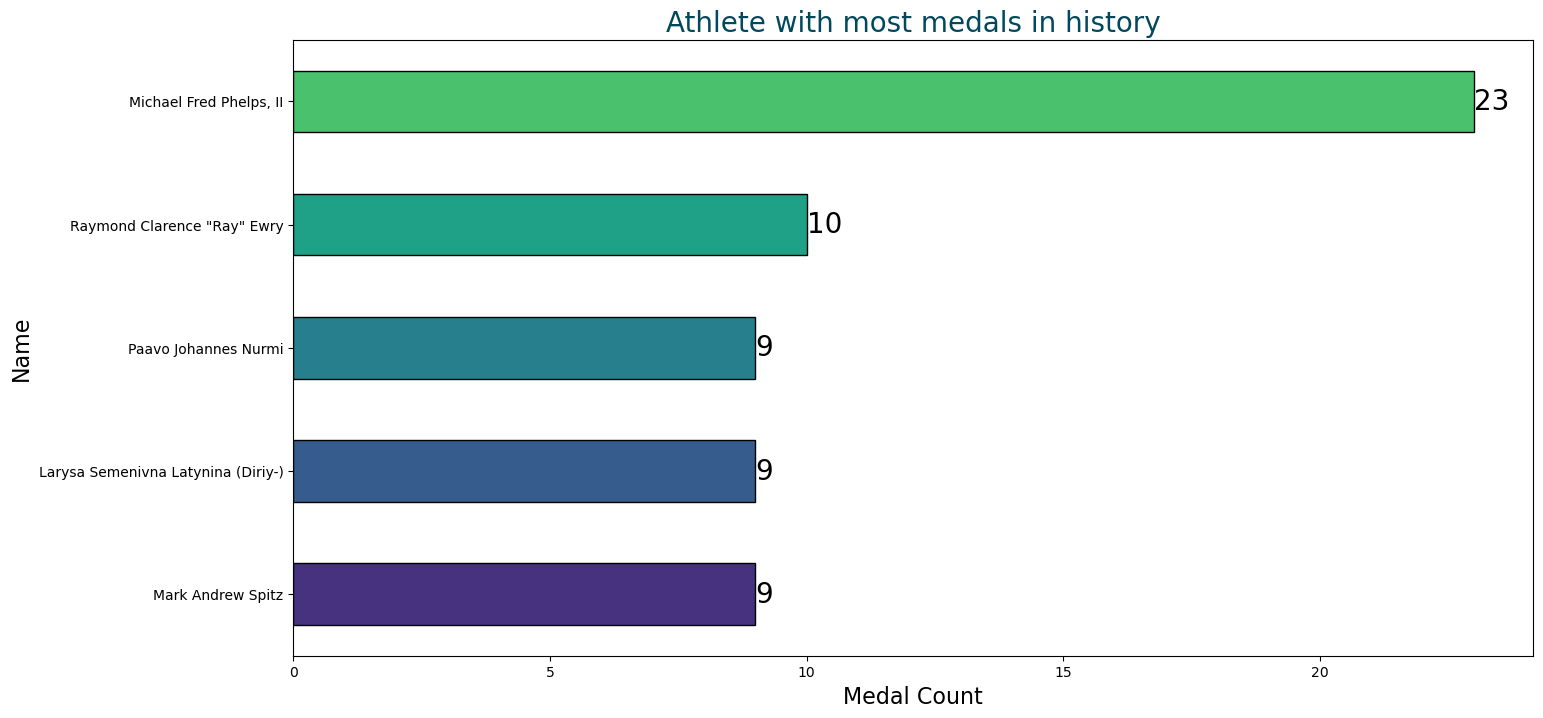

In [18]:
top_medals = gold_medals_counts.head(5).sort_values(ascending=True)

colors = sns.color_palette("viridis")
ax = top_medals.plot(kind = 'barh', edgecolor = 'black', color=colors, rot = 0, figsize = [16,8])
ax.bar_label(ax.containers[0], fontsize = 20)

plt.title('Athlete with most medals in history', color = "#02485c", fontsize = 20)
plt.xlabel('Medal Count', fontsize = 16)
plt.ylabel('Name', fontsize = 16)
plt.show()

### 2. Get the top 5 medal-winning nations from the Olympics?

In [19]:
countries_medal = df_olympic_clean.query('Medal != "No Medal"').groupby('Team').size().sort_values(ascending= False).iloc[:5]

NameError: name 'df_olympic_clean' is not defined

In [ ]:
ax = countries_medal.plot(kind = 'bar', edgecolor = 'black', rot = 0, figsize = [14,6])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.xlabel('Medal Count')
plt.show()

### 3. How many gold, silver, and bronze medals did each nation win in total?

In [ ]:
all_medals = (df_olympic_clean.query('Medal != "No Medal"').groupby('Team').filter(lambda grp: len(grp)>1000)
                                              .groupby(['Team', 'Medal']).size().sort_values(ascending= False)
                                              .unstack())
all_medals

### 4. Which gender took part in the Olympic games the most?? 

In [ ]:
gender_perticipation = df_olympic_clean.groupby('Sex').size()

In [ ]:
ax = gender_perticipation.plot(kind = 'bar', edgecolor = 'black', rot = 0, figsize = [8,6])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.xlabel('Gender Count in all olympics')
plt.show()

### 4. What is the Total Number of Participants Over the Year?

In [ ]:
#gender_perticipation = df_olympic_clean.groupby('Sex').size()
df_olympic_clean.groupby(['Year','Season','Sex'])['Year'].value_counts().unstack('Sex').reset_index().sort_values('Year')